<a href="https://colab.research.google.com/github/aliasgar-akil/Alphabet-Recognition/blob/main/Alphabet_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem 1**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MI Dataset/A_Z Handwritten Data.csv').iloc[:100000]
df.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,...,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617,0.618,0.619,0.620,0.621,0.622,0.623,0.624,0.625,0.626,0.627,0.628,0.629,0.630,0.631,0.632,0.633,0.634,0.635,0.636,0.637,0.638,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = df.drop('0', axis=1)
y = df['0']

In [ ]:
X.shape,y.shape

((100000, 784), (100000,))

# **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.80)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((80000, 784), (80000,), (20000, 784), (20000,))

In [ ]:
sample = np.reshape(X_train.values, (X_train.shape[0], 28,28))
sample.shape

(80000, 28, 28)

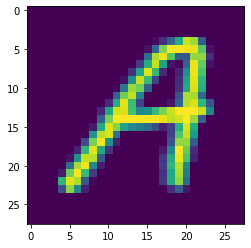

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(sample[100])

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train = to_categorical(y_train,num_classes=26)
y_test = to_categorical(y_test,num_classes=26)
y_train.shape

(80000, 26)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(32,activation='relu', input_shape=(784,)))
model.add(Dense(32,activation='relu'))
model.add(Dense(26,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 26)                858       
Total params: 27,034
Trainable params: 27,034
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test,y_test))

Epoch 1/10
2500/2500 [==============================] - 12s 4ms/step - loss: 0.3814 - accuracy: 0.8912 - val_loss: 0.1964 - val_accuracy: 0.9426
Epoch 2/10
2500/2500 [==============================] - 9s 4ms/step - loss: 0.1771 - accuracy: 0.9497 - val_loss: 0.1584 - val_accuracy: 0.9552
Epoch 3/10
2500/2500 [==============================] - 9s 4ms/step - loss: 0.1378 - accuracy: 0.9607 - val_loss: 0.1309 - val_accuracy: 0.9632
Epoch 4/10
2500/2500 [==============================] - 9s 4ms/step - loss: 0.1150 - accuracy: 0.9661 - val_loss: 0.1215 - val_accuracy: 0.9652
Epoch 5/10
2500/2500 [==============================] - 9s 4ms/step - loss: 0.1017 - accuracy: 0.9707 - val_loss: 0.1142 - val_accuracy: 0.9676
Epoch 6/10
2500/2500 [==============================] - 9s 4ms/step - loss: 0.0919 - accuracy: 0.9742 - val_loss: 0.1079 - val_accuracy: 0.9707
Epoch 7/10
2500/2500 [==============================] - 9s 4ms/step - loss: 0.0847 - accuracy: 0.9761 - val_loss: 0.1143 - val_accuracy

In [ ]:
model.save("Alphabet_Recognizer.h5")

In [ ]:
X_test = np.reshape(X_test.values, (X_test.shape[0], 28,28))

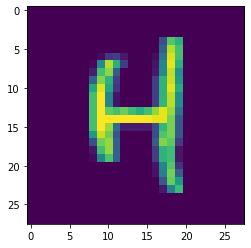

In [ ]:
plt.imshow(X_test[87])

#**Predictor Function**

In [ ]:
encode = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}
def alphabet_predictor(X):
  n = model.predict(X.reshape(1,784)).argmax()
  return encode[n]

In [ ]:
alphabet_predictor(X_test[87])

'H'

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model1 = load_model('Alphabet_Recognizer.h5')

In [ ]:
n = model1.predict(X_test[87].reshape(1,784)).argmax()
encode[n]

'H'